# Doğal Dil İşleme (NLP) Nedir?

Doğal Dil İşleme (Natural Language Processing - NLP), bilgisayarların insan dilini anlama, analiz etme, üretme ve yorumlama yeteneğini geliştirmeye odaklanan bir yapay zeka alanıdır. NLP, dilbilim, bilgisayar bilimi ve yapay zekanın kesişiminde yer alır ve metin veya konuşma verileri üzerinde otomatik işlemler gerçekleştirmek için çeşitli yöntemler ve algoritmalar kullanır.

NLP'nin temel amaçları arasında; metin sınıflandırma, duygu analizi, makine çevirisi, otomatik özetleme, bilgi çıkarımı, soru-cevap sistemleri ve sohbet botları gibi uygulamalar yer alır. Modern NLP uygulamaları, büyük veri setleri ve derin öğrenme teknikleriyle desteklenerek, insan dilinin karmaşıklıklarını daha iyi anlamaya ve modellemeye çalışır.

NLP, günümüzde arama motorlarından sosyal medya analizine, müşteri hizmetlerinden sağlık sektörüne kadar birçok alanda aktif olarak kullanılmaktadır. İnsan-makine etkileşimini daha doğal ve verimli hale getirmek için vazgeçilmez bir teknolojidir.

# Metin Önişleme (Text Preprocessing) Nedir?

Metin önişleme, ham metin verisinin analiz ve modelleme için daha uygun ve anlamlı bir forma dönüştürülmesi sürecidir. Gerçek hayatta elde edilen metinler; yazım hataları, gereksiz karakterler, tutarsız biçimlendirme, noktalama işaretleri ve anlamsız kelimeler gibi birçok gürültü içerir.

Önişleme adımları sayesinde metin verisi temizlenir, standartlaştırılır ve makine öğrenmesi ya da derin öğrenme modellerinin daha iyi performans göstermesi sağlanır. Tipik önişleme adımları şunlardır:

- Küçük harfe çevirme (lowercasing)
- Noktalama işaretlerini kaldırma
- Sayıları temizleme
- Gereksiz boşlukları silme
- Stopword (anlamsız kelime) temizliği
- Kök bulma (stemming) veya gövdeleme (lemmatization)
- Tokenizasyon (metni kelime/cümle parçalarına ayırma)

Başarılı bir NLP projesi için önişleme adımlarının doğru ve eksiksiz uygulanması kritik öneme sahiptir.

In [8]:
# pandas: Tablo şeklindeki verileri (ör. csv dosyaları) kolayca okumak, düzenlemek ve analiz etmek için kullanılır.
import pandas as pd

# pandas'ın veri gösterimini daha okunabilir yapmak için bazı ayarları değiştiriyoruz.
pd.set_option('display.max_colwidth', None)   # Bir hücredeki metnin tamamını göstermek için.
pd.set_option('display.max_columns', None)    # Tüm sütunları ekranda göstermek için.
pd.set_option('display.width', 200)           # Çıktı genişliğini artırmak için.
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Ondalıklı sayıları daha okunabilir göstermek için.

# matplotlib.pyplot: Grafik ve görselleştirme işlemleri için kullanılır. Verileri görsel olarak analiz etmek için gereklidir.
import matplotlib.pyplot as plt

# numpy: Sayısal işlemler ve büyük veri dizileriyle çalışmak için kullanılır. Özellikle matematiksel işlemler için temel kütüphanedir.
import numpy as np

# seaborn: Grafiklerin daha şık ve istatistiksel olarak anlamlı olmasını sağlar. Matplotlib üzerine kurulu gelişmiş bir görselleştirme kütüphanesidir.
import seaborn as sns

In [9]:
# nltk: Doğal dil işleme işlemleri (tokenizasyon, stopword, vb.) için kullanılır.
import nltk

# Aşağıdaki pip komutları, eksikse ilgili kütüphaneleri yüklemek için kullanılır.
# Jupyter Notebook'ta veya Google Colab'da çalışıyorsanız başına ! koyarak çalıştırabilirsiniz.
# !pip install nltk
# !pip install textblob
# !pip install wordcloud

# NLTK kütüphanesinin bazı temel veri paketlerini indiriyoruz.
nltk.download('punkt')    # Cümle ve kelime tokenizasyonu için gerekli.
nltk.download('wordnet')  # Lemmatization işlemleri için gerekli.
nltk.download('omw-1.4')  # WordNet lemmatizer için ek dil desteği.

# textblob: Metin üzerinde dil işleme ve yazım düzeltme işlemleri için kullanılır.
from textblob import Word, TextBlob

# wordcloud: Kelime bulutu görselleştirmesi için kullanılır.
from wordcloud import WordCloud

# warnings: Uyarı mesajlarını kontrol etmek için kullanılır. Gereksiz uyarıları gizlemek için ayarlanabilir.
from warnings import filterwarnings
filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
# train.csv dosyasını okuyoruz ve df isimli bir DataFrame'e yüklüyoruz.
# Bu dosya, metin önişleme işlemlerinde kullanacağımız temel veri setidir.

df = pd.read_csv("train.csv")

In [11]:
df.head()  # İlk birkaç satırı görüntüleyerek veri yapısını kontrol edelim.

,Context,Response
0,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today."
1,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?","Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone. Changing our feelings is like changing our thoughts - it's hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it's place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to ""snap out of it"" - which is also a thought that carries some self-criticism. Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the thoughts, you change how you respond to them. You learn skills that allow you to manage difficult thoughts and feelings differently so they don't have the same impact on you that they do right now. For some people, they actually DO begin to experience less hurtful thoughts once they learn how to manage the ones they have differently. Acceptance and Commitment Therapy may be a good choice for you. There is information online and even self-help books that you can use to teach you the skills that I mentioned. Because they are skills, they require practice, but many people have found great relief and an enriched life by learning them. As for suicidal thoughts, I am very glad to read that this has not happened to you. Still, you should watch out for this because it can be a sign of a worsening depression. If you begin to think about this, it is important to reach out to a support system right away. The National Suicide Prevention Lifeline is 1-800-273-8255. The text line is #741741. I hope some other colleagues will provide you more suggestions. Be well...Robin Landwehr, DBH, LPCC"
2,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How

In [12]:
df.shape  # Veri setinin boyutlarını kontrol edelim (satır, sütun).

(3512, 2)

In [13]:
df.info()  # Veri setindeki sütunlar ve veri tipleri hakkında bilgi alalım.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Context   3512 non-null   object
 1   Response  3508 non-null   object
dtypes: object(2)
memory usage: 55.0+ KB


In [14]:
# Veri setindeki boş (NaN) değerlerin sayısını kontrol edelim.
df.isnull().sum()

Context     0
Response    4
dtype: int64

In [15]:
# Random Context:
random_context = df["Context"][1:2]
random_context

1    I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?
Name: Context, dtype: object

Duygularım ve kendimle ilgili bazı sorunlar yaşıyorum. Neredeyse hiç uyumuyorum ve kendimi değersiz hissedip, burada olmamam gerektiğini düşünmekten başka bir şey yapmıyorum.   Hiç intihar etmeyi denemedim veya düşünmedim. Her zaman sorunlarımı çözmek istedim, ama bir türlü başaramadım.   Herkes için değersiz olduğum hissini nasıl değiştirebilirim?

In [17]:
# Öncelikle tüm harfleri küçük harfe çeviriyoruz.
# Bu adım, aynı kelimenin farklı biçimlerde (ör. 'Merhaba' ve 'merhaba') iki farklı kelime olarak algılanmasını önler.
# Böylece analiz ve modelleme sırasında tutarlılık sağlanır.

df["Context"] = df["Context"].str.lower()
df["Response"] = df["Response"].str.lower()

df.head()

,Context,Response
0,"i'm going through some things with my feelings and myself. i barely sleep and i do nothing but think about how i'm worthless and how i shouldn't be here.\n i've never tried or contemplated suicide. i've always wanted to fix my issues, but i never get around to it.\n how can i change my feeling of being worthless to everyone?","if everyone thinks you're worthless, then maybe you need to find new people to hang out with.seriously, the social context in which a person lives is a big influence in self-esteem.otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.there are many inspirational messages you can find in social media. maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.bad feelings are part of living. they are the motivation to remove ourselves from situations and relationships which do us more harm than good.bad feelings do feel terrible. your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today."
1,"i'm going through some things with my feelings and myself. i barely sleep and i do nothing but think about how i'm worthless and how i shouldn't be here.\n i've never tried or contemplated suicide. i've always wanted to fix my issues, but i never get around to it.\n how can i change my feeling of being worthless to everyone?","hello, and thank you for your question and seeking advice on this. feelings of worthlessness is unfortunately common. in fact, most people, if not all, have felt this to some degree at some point in their life. you are not alone. changing our feelings is like changing our thoughts - it's hard to do. our minds are so amazing that the minute you change your thought another one can be right there to take it's place. without your permission, another thought can just pop in there. the new thought may feel worse than the last one! my guess is that you have tried several things to improve this on your own even before reaching out on here. people often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to ""snap out of it"" - which is also a thought that carries some self-criticism. some people try a different approach, and there are counselors out there that can help you with this. the idea is that instead of trying to change the thoughts, you change how you respond to them. you learn skills that allow you to manage difficult thoughts and feelings differently so they don't have the same impact on you that they do right now. for some people, they actually do begin to experience less hurtful thoughts once they learn how to manage the ones they have differently. acceptance and commitment therapy may be a good choice for you. there is information online and even self-help books that you can use to teach you the skills that i mentioned. because they are skills, they require practice, but many people have found great relief and an enriched life by learning them. as for suicidal thoughts, i am very glad to read that this has not happened to you. still, you should watch out for this because it can be a sign of a worsening depression. if you begin to think about this, it is important to reach out to a support system right away. the national suicide prevention lifeline is 1-800-273-8255. the text line is #741741. i hope some other colleagues will provide you more suggestions. be well...robin landwehr, dbh, lpcc"
2,"i'm going through some things with my feelings and myself. i barely sleep and i do nothing but think about how i'm worthless and how i shouldn't be here.\n i've never tried or contemplated suicide. i've always wanted to fix my issues, but i never get around to it.\n how

In [19]:
from string import punctuation  # string modülünden noktalama işaretleri listesini alıyoruz.

# punctuation değişkeni, tüm noktalama işaretlerini içeren bir karakter dizisidir.
# Metinden noktalama işaretlerini temizlerken bu karakterleri kullanacağız.
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
# Noktalama işaretlerini kaldırma:

df["Context"] = df["Context"].str.translate(str.maketrans('', '', punctuation))
df["Response"] = df["Response"].str.translate(str.maketrans('', '', punctuation))
df.head()

,Context,Response
0,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here\n ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it\n how can i change my feeling of being worthless to everyone,if everyone thinks youre worthless then maybe you need to find new people to hang out withseriously the social context in which a person lives is a big influence in selfesteemotherwise you can go round and round trying to understand why youre not worthless then go back to the same crowd and be knocked down againthere are many inspirational messages you can find in social media maybe read some of the ones which state that no person is worthless and that everyone has a good purpose to their lifealso since our culture is so saturated with the belief that if someone doesnt feel good about themselves that this is somehow terriblebad feelings are part of living they are the motivation to remove ourselves from situations and relationships which do us more harm than goodbad feelings do feel terrible your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today
1,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here\n ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it\n how can i change my feeling of being worthless to everyone,hello and thank you for your question and seeking advice on this feelings of worthlessness is unfortunately common in fact most people if not all have felt this to some degree at some point in their life you are not alone changing our feelings is like changing our thoughts its hard to do our minds are so amazing that the minute you change your thought another one can be right there to take its place without your permission another thought can just pop in there the new thought may feel worse than the last one my guess is that you have tried several things to improve this on your own even before reaching out on here people often try thinking positive thoughts debating with their thoughts or simply telling themselves that they need to snap out of it which is also a thought that carries some selfcriticism some people try a different approach and there are counselors out there that can help you with this the idea is that instead of trying to change the thoughts you change how you respond to them you learn skills that allow you to manage difficult thoughts and feelings differently so they dont have the same impact on you that they do right now for some people they actually do begin to experience less hurtful thoughts once they learn how to manage the ones they have differently acceptance and commitment therapy may be a good choice for you there is information online and even selfhelp books that you can use to teach you the skills that i mentioned because they are skills they require practice but many people have found great relief and an enriched life by learning them as for suicidal thoughts i am very glad to read that this has not happened to you still you should watch out for this because it can be a sign of a worsening depression if you begin to think about this it is important to reach out to a support system right away the national suicide prevention lifeline is 18002738255 the text line is 741741 i hope some other colleagues will provide you more suggestions be wellrobin landwehr dbh lpcc
2,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here\n ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it\n how can i change my feeling of being worthless to everyone,first thing id suggest is getting the sleep you need or it will i

Eğer herkes senin değersiz olduğunu düşünüyorsa, belki de takılmak için yeni insanlar bulman gerekir. Cidden, bir kişinin yaşadığı sosyal çevre, özgüven üzerinde büyük bir etkiye sahiptir. Aksi takdirde, neden değersiz olmadığını anlamaya çalışarak döngüye girip, aynı gruba geri dönüp tekrar yıkılabilirsin. Sosyal medyada birçok ilham verici mesaj bulabilirsin. Belki de hiç kimsenin değersiz olmadığını ve herkesin hayatında iyi bir amacı olduğunu belirten mesajları okuyabilirsin. Ayrıca kültürümüz, bir kişinin kendini iyi hissetmemesinin bir şekilde korkunç bir şey olduğu inancıyla o kadar doygun ki, kötü duygular yaşamın bir parçasıdır. Kötü duygular, bize yarardan çok zarar veren durumlardan ve ilişkilerden kendimizi uzaklaştırmak için motivasyon kaynağıdır. Kötü duygular gerçekten korkunçtur. Değersizlik hissin, bugün hissettiklerinden çok daha iyi olduğunu keşfetmen için sana motivasyon sağlama açısından iyi olabilir.

In [24]:
# Sayıları temizleme:
# Ayrıca, boşluk karakterlerini de temizlemek için ardından fazladan boşlukları da temizleyebilirsiniz.

df["Context"] = df["Context"].str.replace(r'\d+', '', regex=True)  # Context sütunundaki sayıları kaldırıyoruz.
df["Response"] = df["Response"].str.replace(r'\d+', '', regex=True)  # Response sütunundaki sayıları kaldırıyoruz.

# Fazla boşlukları temizleyelim (isteğe bağlı, daha temiz sonuç için):
df["Context"] = df["Context"].str.replace(r'\s+', ' ', regex=True).str.strip()
df["Response"] = df["Response"].str.replace(r'\s+', ' ', regex=True).str.strip()

df.head()

,Context,Response
0,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it how can i change my feeling of being worthless to everyone,if everyone thinks youre worthless then maybe you need to find new people to hang out withseriously the social context in which a person lives is a big influence in selfesteemotherwise you can go round and round trying to understand why youre not worthless then go back to the same crowd and be knocked down againthere are many inspirational messages you can find in social media maybe read some of the ones which state that no person is worthless and that everyone has a good purpose to their lifealso since our culture is so saturated with the belief that if someone doesnt feel good about themselves that this is somehow terriblebad feelings are part of living they are the motivation to remove ourselves from situations and relationships which do us more harm than goodbad feelings do feel terrible your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today
1,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it how can i change my feeling of being worthless to everyone,hello and thank you for your question and seeking advice on this feelings of worthlessness is unfortunately common in fact most people if not all have felt this to some degree at some point in their life you are not alone changing our feelings is like changing our thoughts its hard to do our minds are so amazing that the minute you change your thought another one can be right there to take its place without your permission another thought can just pop in there the new thought may feel worse than the last one my guess is that you have tried several things to improve this on your own even before reaching out on here people often try thinking positive thoughts debating with their thoughts or simply telling themselves that they need to snap out of it which is also a thought that carries some selfcriticism some people try a different approach and there are counselors out there that can help you with this the idea is that instead of trying to change the thoughts you change how you respond to them you learn skills that allow you to manage difficult thoughts and feelings differently so they dont have the same impact on you that they do right now for some people they actually do begin to experience less hurtful thoughts once they learn how to manage the ones they have differently acceptance and commitment therapy may be a good choice for you there is information online and even selfhelp books that you can use to teach you the skills that i mentioned because they are skills they require practice but many people have found great relief and an enriched life by learning them as for suicidal thoughts i am very glad to read that this has not happened to you still you should watch out for this because it can be a sign of a worsening depression if you begin to think about this it is important to reach out to a support system right away the national suicide prevention lifeline is the text line is i hope some other colleagues will provide you more suggestions be wellrobin landwehr dbh lpcc
2,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it how can i change my feeling of being worthless to everyone,first thing id suggest is getting the sleep you need or it will impact how you think and feel id

In [25]:
# Metindeki rare kelimeleri (nadir kelimeler) temizleme:
# Öncelikle tüm kelimeleri tek bir listeye toplayalım.
all_words = pd.Series(' '.join(df['Context']).split()).value_counts()
all_words

i          13083
and         6720
to          6436
my          4681
a           4529
           ...  
ativan         1
topamax        1
thru           1
among          1
stood          1
Name: count, Length: 3753, dtype: int64

In [32]:
drops = all_words[all_words <= 1].index  # Sadece bir kez geçen kelimeleri seçiyoruz.

# Bazı satırlarda Response sütununda eksik (NaN) değerler olabilir.
# Bu nedenle, önce tüm değerleri string'e çeviriyoruz ve eksik değerleri boş string ile değiştiriyoruz.

df["Response"] = df["Response"].fillna("").astype(str)
df["Context"] = df["Context"].fillna("").astype(str)

# Her satırdaki kelimelerden nadir (rare) kelimeleri kaldırıyoruz.
df["Context"] = df["Context"].apply(lambda x: " ".join([word for word in x.split() if word not in drops]))
df["Response"] = df["Response"].apply(lambda x: " ".join([word for word in x.split() if word not in drops]))

df.head()

,Context,Response
0,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it how can i change my feeling of being worthless to everyone,if everyone thinks youre worthless then maybe you need to find new people to hang out withseriously the social context in which a person lives is a big influence in selfesteemotherwise you can go round and round trying to understand why youre not worthless then go back to the same crowd and be knocked down againthere are many inspirational messages you can find in social media maybe read some of the ones which state that no person is worthless and that everyone has a good purpose to their lifealso since our culture is so saturated with the belief that if someone doesnt feel good about themselves that this is somehow terriblebad feelings are part of living they are the motivation to remove ourselves from situations and relationships which do us more harm than goodbad feelings do feel terrible your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today
1,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it how can i change my feeling of being worthless to everyone,hello and thank you for your question and seeking advice on this feelings of worthlessness is unfortunately in fact most people if not all have felt this to some degree at some point in their life you are not alone changing our feelings is like changing our thoughts its hard to do our minds are so amazing that the minute you change your thought another one can be right there to take its place without your permission another thought can just pop in there the new thought may feel worse than the last one my guess is that you have tried several things to this on your own even before reaching out on here people often try thinking positive thoughts debating with their thoughts or simply telling themselves that they need to snap out of it which is also a thought that carries some selfcriticism some people try a different approach and there are counselors out there that can help you with this the idea is that instead of trying to change the thoughts you change how you respond to them you learn skills that allow you to manage difficult thoughts and feelings differently so they dont have the same impact on you that they do right now for some people they actually do begin to experience less hurtful thoughts once they learn how to manage the ones they have differently acceptance and commitment therapy may be a good choice for you there is information online and even selfhelp books that you can use to teach you the skills that i mentioned because they are skills they require practice but many people have found great relief and an enriched life by learning them as for suicidal thoughts i am very glad to read that this has not happened to you still you should watch out for this because it can be a sign of a worsening depression if you begin to think about this it is important to reach out to a support system right away the national suicide prevention lifeline is the text line is i hope some other colleagues will provide you more suggestions be wellrobin landwehr dbh lpcc
2,im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it how can i change my feeling of being worthless to everyone,first thing id suggest is getting the sleep you need or it will impact how you think and feel id look at findin

In [40]:
random_context = df["Context"][1:2]

In [41]:
import nltk  # nltk kütüphanesini içe aktarıyoruz (doğal dil işleme için).
nltk.download('punkt_tab')  # Eğer 'punkt_tab' veri seti gerekiyorsa indiriyoruz (genellikle 'punkt' yeterlidir).

from nltk.tokenize import sent_tokenize, word_tokenize  # Cümle ve kelime tokenizasyonu için fonksiyonları yüklüyoruz.
# sent_tokenize: Metni cümlelere ayırır.
# word_tokenize: Metni kelimelere ayırır.

random_context_str = random_context.iloc[0]  # Örnek bir metni string olarak alıyoruz.

sent_tokenize(random_context_str)  # Metni cümlelere ayırıyoruz.

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['im going through some things with my feelings and myself i barely sleep and i do nothing but think about how im worthless and how i shouldnt be here ive never tried or contemplated suicide ive always wanted to fix my issues but i never get around to it how can i change my feeling of being worthless to everyone']

In [42]:
# word_tokenize fonksiyonu ile metni kelimelere ayırıyoruz (tokenizasyon işlemi).
tokenize_random_context = word_tokenize(random_context_str)
tokenize_random_context  # Tokenize edilmiş (kelimeye ayrılmış) hali ekrana yazdırıyoruz.

['im',
 'going',
 'through',
 'some',
 'things',
 'with',
 'my',
 'feelings',
 'and',
 'myself',
 'i',
 'barely',
 'sleep',
 'and',
 'i',
 'do',
 'nothing',
 'but',
 'think',
 'about',
 'how',
 'im',
 'worthless',
 'and',
 'how',
 'i',
 'shouldnt',
 'be',
 'here',
 'ive',
 'never',
 'tried',
 'or',
 'contemplated',
 'suicide',
 'ive',
 'always',
 'wanted',
 'to',
 'fix',
 'my',
 'issues',
 'but',
 'i',
 'never',
 'get',
 'around',
 'to',
 'it',
 'how',
 'can',
 'i',
 'change',
 'my',
 'feeling',
 'of',
 'being',
 'worthless',
 'to',
 'everyone']

In [43]:
len(tokenize_random_context)

60

# Stop Words (Anlamsız Kelimeler) Nedir ve Neden Temizlenir?

**Stop words**, NLP çalışmalarında sıkça karşılaşılan ve metinlerde çok sık geçen, ancak tek başına anlam taşımayan kelimelerdir. Türkçede "ve", "ile", "bu", "şu", "için", "ama", "gibi"; İngilizcede ise "the", "is", "and", "in", "on", "at" gibi kelimeler stop words örnekleridir.

Bu kelimeler, cümlelerin gramer yapısını oluşturmak için gereklidir fakat metnin temel anlamına veya analizine katkı sağlamazlar. NLP projelerinde stop words'lerin metinden çıkarılması, aşağıdaki avantajları sağlar:

- **Gürültüyü azaltır:** Anlamsız kelimeler çıkarıldığında, modelin öğrenmesi gereken veri daha anlamlı ve temiz olur.
- **Veri boyutunu küçültür:** Özellikle büyük veri setlerinde gereksiz kelimeler çıkarılarak işlem yükü azaltılır.
- **Daha iyi sonuçlar:** Metnin asıl anlamını taşıyan kelimeler öne çıkar, böylece metin madenciliği, sınıflandırma ve analiz işlemlerinde daha doğru sonuçlar elde edilir.

Sonuç olarak, stop words temizliği, metin önişlemenin temel adımlarından biridir ve NLP projelerinde model başarısını artırmak için mutlaka uygulanmalıdır.

In [46]:
from nltk.corpus import stopwords  # NLTK kütüphanesinden stopwords (anlamsız kelimeler) listesini yüklüyoruz.
nltk.download('stopwords')  # Stopwords veri setini indiriyoruz.

sw = stopwords.words('english')  # İngilizce stopwords listesini alıyoruz.
sw[:10]  # İlk 10 stopword'ü görüntülüyoruz.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [47]:
df["Context"] = df["Context"].apply(lambda x: " ".join([word for word in x.split() if word not in sw]))
df["Response"] = df["Response"].apply(lambda x: " ".join([word for word in x.split() if word not in sw]))
df.head()

,Context,Response
0,im going things feelings barely sleep nothing think im worthless shouldnt ive never tried contemplated suicide ive always wanted fix issues never get around change feeling worthless everyone,everyone thinks youre worthless maybe need find new people hang withseriously social context person lives big influence selfesteemotherwise go round round trying understand youre worthless go back crowd knocked againthere many inspirational messages find social media maybe read ones state person worthless everyone good purpose lifealso since culture saturated belief someone doesnt feel good somehow terriblebad feelings part living motivation remove situations relationships us harm goodbad feelings feel terrible feeling worthlessness may good sense motivating find much better feelings today
1,im going things feelings barely sleep nothing think im worthless shouldnt ive never tried contemplated suicide ive always wanted fix issues never get around change feeling worthless everyone,hello thank question seeking advice feelings worthlessness unfortunately fact people felt degree point life alone changing feelings like changing thoughts hard minds amazing minute change thought another one right take place without permission another thought pop new thought may feel worse last one guess tried several things even reaching people often try thinking positive thoughts debating thoughts simply telling need snap also thought carries selfcriticism people try different approach counselors help idea instead trying change thoughts change respond learn skills allow manage difficult thoughts feelings differently dont impact right people actually begin experience less hurtful thoughts learn manage ones differently acceptance commitment therapy may good choice information online even selfhelp books use teach skills mentioned skills require practice many people found great relief enriched life learning suicidal thoughts glad read happened still watch sign worsening depression begin think important reach support system right away national suicide prevention lifeline text line hope colleagues provide suggestions wellrobin landwehr dbh lpcc
2,im going things feelings barely sleep nothing think im worthless shouldnt ive never tried contemplated suicide ive always wanted fix issues never get around change feeling worthless everyone,first thing id suggest getting sleep need impact think feel id look finding going well life grateful believe everyone talents wants find purpose life think figure help
3,im going things feelings barely sleep nothing think im worthless shouldnt ive never tried contemplated suicide ive always wanted fix issues never get around change feeling worthless everyone,therapy essential feeling depressed worthless work experiencing related feeling depression issues self esteem generally work client help build coping skills reduce level depression assist strengthening self esteem guiding client practices helps gaining better awareness thought process influences belief system beliefs impact actions outcome behaviors process isn’t easy helps teach individual don’t always control happens lives control interpret feel behave good individuals dealing depression anxiety toxic relationships stress self esteem codependency etc
4,im going things feelings barely sleep nothing think im worthless shouldnt ive never tried contemplated suicide ive always wanted fix issues never get around change feeling worthless everyone,first want let know alone feelings always someone help always change feelings change way thinking open trying change always make available learning new things volunteering make purpose


In [48]:
without_stopwords = []
for word in tokenize_random_context:
    if word not in stopwords.words('english'):
        without_stopwords.append(word)
        
without_stopwords

['im',
 'going',
 'things',
 'feelings',
 'barely',
 'sleep',
 'nothing',
 'think',
 'im',
 'worthless',
 'shouldnt',
 'ive',
 'never',
 'tried',
 'contemplated',
 'suicide',
 'ive',
 'always',
 'wanted',
 'fix',
 'issues',
 'never',
 'get',
 'around',
 'change',
 'feeling',
 'worthless',
 'everyone']

In [49]:
len(without_stopwords)

28

# Stemming ve Lemmatization Nedir?

**Stemming** ve **lemmatization**, NLP projelerinde metindeki kelimeleri kök veya gövde hallerine indirgeme işlemleridir. Bu iki yöntem, metindeki farklı biçimlerdeki kelimeleri standart bir forma getirerek veri boyutunu azaltır ve modelin daha anlamlı öğrenmesini sağlar.

---

## Stemming (Kök Bulma)

Stemming, kelimenin sonundaki ekleri veya türevleri keserek kelimeyi kök haline indirger. Bu işlem genellikle dilin gramer kurallarını dikkate almadan, basit kurallarla yapılır. Örneğin:

- **running** → **run**
- **better** → **better** (her zaman doğru kök bulunamayabilir)
- **studies** → **studi**

Stemming hızlıdır ancak bazen anlamsız veya hatalı kökler üretebilir. İngilizce için en yaygın stemming algoritmalarından biri Porter Stemmer'dır.

---

## Lemmatization (Gövdeleme)

Lemmatization ise kelimeyi köküne indirgerken dilin gramer kurallarını ve kelimenin sözlükteki (lemma) gerçek kökünü dikkate alır. Lemmatization, kelimenin türünü (isim, fiil, sıfat vb.) de göz önünde bulundurur ve daha doğru sonuçlar üretir. Örneğin:

- **running** → **run**
- **better** → **good**
- **studies** → **study**

Lemmatization, stemming'e göre daha yavaş olabilir ancak anlam açısından daha güvenilirdir.

---

### Neden Kullanılırlar?

- **Veri boyutunu küçültmek:** Farklı biçimlerdeki kelimeleri tek bir kökte toplar.
- **Model başarısını artırmak:** Anlamca aynı olan kelimelerin tek bir temsil ile işlenmesini sağlar.
- **Gürültüyü azaltmak:** Gereksiz varyasyonları ortadan kaldırır.

Sonuç olarak, stemming ve lemmatization, metin önişlemenin önemli adımlarındandır ve doğru uygulandığında NLP projelerinde model başarısını artırır.

In [50]:
from nltk.stem import PorterStemmer  # NLTK kütüphanesinden PorterStemmer sınıfını yüklüyoruz.
stemmer = PorterStemmer()  # PorterStemmer nesnesi oluşturuyoruz.

In [51]:
# Stop wordsların kaldırıldığı metin üzerinde stemming işlemi uygulayalım.
stemmed_words = [stemmer.stem(word) for word in without_stopwords]
stemmed_words

['im',
 'go',
 'thing',
 'feel',
 'bare',
 'sleep',
 'noth',
 'think',
 'im',
 'worthless',
 'shouldnt',
 'ive',
 'never',
 'tri',
 'contempl',
 'suicid',
 'ive',
 'alway',
 'want',
 'fix',
 'issu',
 'never',
 'get',
 'around',
 'chang',
 'feel',
 'worthless',
 'everyon']

In [52]:
len(without_stopwords)

28

In [53]:
from nltk.stem import WordNetLemmatizer  # NLTK kütüphanesinden WordNetLemmatizer sınıfını yüklüyoruz.
nltk.download('wordnet')  # WordNet veri setini indiriyoruz.
lemmatizer = WordNetLemmatizer()  # WordNetLemmatizer nesnesi oluşturuyoruz.
lemmatized_words = [lemmatizer.lemmatize(word) for word in without_stopwords]
lemmatized_words

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['im',
 'going',
 'thing',
 'feeling',
 'barely',
 'sleep',
 'nothing',
 'think',
 'im',
 'worthless',
 'shouldnt',
 'ive',
 'never',
 'tried',
 'contemplated',
 'suicide',
 'ive',
 'always',
 'wanted',
 'fix',
 'issue',
 'never',
 'get',
 'around',
 'change',
 'feeling',
 'worthless',
 'everyone']

In [55]:
# Stemming ve lemmatization arasındaki farkı görmek için:
print("better - Stemmed:", stemmer.stem("better", "a"), ", Lemmatized:", lemmatizer.lemmatize("better", "a"))

better - Stemmed: better , Lemmatized: good


In [57]:
words_examples = ["running", "runner", "ran", "runs", "go", "went"]

stemming_words = [stemmer.stem(word) for word in words_examples]
lemmatization_words = [lemmatizer.lemmatize(word, pos='v') for word in words_examples] # fiil olduğu için pos içine "v" yazdık

print("Stemming:", stemming_words)
print("Lemmatization:", lemmatization_words)

Stemming: ['run', 'runner', 'ran', 'run', 'go', 'went']
Lemmatization: ['run', 'runner', 'run', 'run', 'go', 'go']


# Part of Speech Tagging (Sözcük Türü Etiketleme) Nedir ve NLP'de Neden Kullanılır?

**Part of Speech Tagging (POS Tagging)**, bir metindeki her kelimenin dilbilgisel türünü (isim, fiil, sıfat, zarf, zamir vb.) otomatik olarak belirleme işlemidir. Her kelimeye, cümledeki bağlamına göre uygun bir etiket atanır. Örneğin:

- **run** kelimesi, \"I run every day\" cümlesinde fiil (VB), \"I went for a run\" cümlesinde ise isim (NN) olarak etiketlenir.

---

## POS Tagging'in NLP'deki Kullanım Alanları

- **Anlam Çözümleme:** Cümledeki kelimelerin türünü bilmek, metnin anlamını daha iyi analiz etmeyi sağlar.
- **Lemmatization:** Kelimenin doğru köküne ulaşmak için tür bilgisinin bilinmesi gerekir (ör. \"better\" kelimesi sıfat ise kökü \"good\" olur).
- **Ad Öbeği ve Cümle Yapısı Analizi:** Metindeki isim, fiil, sıfat öbeklerini tespit etmek için kullanılır.
- **Makine Çevirisi:** Doğru çeviri için kelimenin türü önemlidir.
- **Adlandırılmış Varlık Tanıma (NER):** Kişi, yer, organizasyon gibi özel isimlerin tespitinde yardımcı olur.
- **Duygu Analizi ve Metin Sınıflandırma:** Kelimelerin türüne göre duygu veya konu analizi daha hassas yapılabilir.

---

## Neden Önemlidir?

POS tagging, metindeki kelimelerin işlevini anlamamıza ve daha karmaşık dil işleme görevlerinde doğru sonuçlar elde etmemize yardımcı olur. Özellikle çok anlamlı kelimelerin doğru şekilde analiz edilmesi ve doğal dilin karmaşıklıklarının modellenmesi için vazgeçilmez bir adımdır.

In [61]:
nltk.download('averaged_perceptron_tagger_eng')  # POS tagging için gerekli veri setini indiriyoruz.    
post = nltk.pos_tag(tokenize_random_context)
post  # Kelimelerin yanında POS (Part-of-Speech) etiketleri ile birlikte görüntülüyoruz.

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Cemal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


[('im', 'NN'),
 ('going', 'VBG'),
 ('through', 'IN'),
 ('some', 'DT'),
 ('things', 'NNS'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('feelings', 'NNS'),
 ('and', 'CC'),
 ('myself', 'PRP'),
 ('i', 'VBP'),
 ('barely', 'RB'),
 ('sleep', 'JJ'),
 ('and', 'CC'),
 ('i', 'JJ'),
 ('do', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('think', 'VBP'),
 ('about', 'IN'),
 ('how', 'WRB'),
 ('im', 'JJ'),
 ('worthless', 'NN'),
 ('and', 'CC'),
 ('how', 'WRB'),
 ('i', 'JJ'),
 ('shouldnt', 'NN'),
 ('be', 'VB'),
 ('here', 'RB'),
 ('ive', 'JJ'),
 ('never', 'RB'),
 ('tried', 'VBD'),
 ('or', 'CC'),
 ('contemplated', 'VBN'),
 ('suicide', 'JJ'),
 ('ive', 'JJ'),
 ('always', 'RB'),
 ('wanted', 'VBD'),
 ('to', 'TO'),
 ('fix', 'VB'),
 ('my', 'PRP$'),
 ('issues', 'NNS'),
 ('but', 'CC'),
 ('i', 'VBP'),
 ('never', 'RB'),
 ('get', 'VBP'),
 ('around', 'IN'),
 ('to', 'TO'),
 ('it', 'PRP'),
 ('how', 'WRB'),
 ('can', 'MD'),
 ('i', 'VB'),
 ('change', 'VB'),
 ('my', 'PRP$'),
 ('feeling', 'NN'),
 ('of', 'IN'),
 ('being', 'VBG'),
 (

# Named Entity Recognition (NER) Nedir?

**Named Entity Recognition (NER)**, doğal dil işleme (NLP) alanında bir metin içerisindeki özel isimleri (varlıkları) otomatik olarak tespit etme ve sınıflandırma işlemidir. NER algoritmaları, metindeki kişi adları, yer adları, organizasyonlar, tarih, saat, para birimi, yüzde gibi anlamlı ve önemli varlıkları bulur ve etiketler.

---

## NER ile Tespit Edilebilen Varlık Türleri

- **Kişi Adları (Person):** Örneğin, “Ahmet Yılmaz”, “Elon Musk”
- **Yer Adları (Location):** Şehir, ülke, coğrafi bölge (örn. “İstanbul”, “Paris”, “Türkiye”)
- **Organizasyonlar (Organization):** Şirket, kurum, dernek (örn. “Google”, “UNICEF”)
- **Tarih ve Saat (Date/Time):** “12 Mayıs 2024”, “saat 15:30”
- **Para Birimi (Money):** “100 TL”, “$50”
- **Yüzde (Percent):** “%20”, “yüzde 10”

---

## NER'in NLP'deki Kullanım Alanları

- **Bilgi Çıkarımı:** Metinden anlamlı ve önemli bilgiler elde etmek.
- **Otomatik Özetleme:** Önemli varlıkları öne çıkararak özet oluşturmak.
- **Soru-Cevap Sistemleri:** Kullanıcının sorduğu soruya uygun varlıkları bulmak.
- **Arama Motorları:** Sorgularda geçen özel isimleri doğru şekilde analiz etmek.
- **Metin Sınıflandırma ve Analiz:** Varlık türlerine göre metni kategorize etmek veya analiz etmek.

---

## Neden Önemlidir?

NER, metindeki önemli ögeleri otomatik olarak bulup etiketleyerek, metin madenciliği ve bilgi çıkarımı süreçlerinde büyük kolaylık sağlar. Özellikle büyük veri setlerinde, insan müdahalesi olmadan anlamlı bilgiye ulaşmak için vazgeçilmez bir NLP tekniğidir.

In [66]:
# Eğer spaCy modeli yüklü değilse aşağıdaki kod ile yükleyebilirsiniz:
!python -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [70]:

import spacy

# SpaCy'nin İngilizce modelini yüklüyoruz
nlp = spacy.load("en_core_web_sm")

# Örnek metin
text = "Elon Musk announced on October 14, 2024, that SpaceX company plans to establish a base on Mars by 2030."

# Metni analiz et
doc = nlp(text)

# Varlıkları (Entities) bul ve yazdır
print(f"{'Entity':<30} {'Label':<15} {'Explanation'}")
print("-" * 60)
for ent in doc.ents:
    print(f"{ent.text:<30} {ent.label_:<15} {spacy.explain(ent.label_)}")

Entity                         Label           Explanation
------------------------------------------------------------
Elon Musk                      PERSON          People, including fictional
October 14, 2024               DATE            Absolute or relative dates or periods
Mars                           LOC             Non-GPE locations, mountain ranges, bodies of water
2030                           DATE            Absolute or relative dates or periods


# Text Visualization (Metin Görselleştirme) Nedir?

**Text visualization (metin görselleştirme)**, metin verilerinin analizini kolaylaştırmak ve içgörü elde etmek için metindeki kelime, cümle veya öbeklerin görsel olarak sunulmasıdır. NLP projelerinde, büyük ve karmaşık metinlerin özetlenmesi, önemli kelimelerin veya temaların öne çıkarılması ve veri içindeki örüntülerin keşfedilmesi için görselleştirme teknikleri kullanılır.

---

## Yaygın Metin Görselleştirme Yöntemleri

- **Word Cloud (Kelime Bulutu):** Metindeki en sık geçen kelimeleri büyüklüklerine göre görselleştirir. Sık geçen kelimeler daha büyük ve belirgin görünür.
- **Bar Chart (Çubuk Grafik):** En sık geçen kelimelerin veya n-gramların frekanslarını çubuklarla gösterir.
- **Histogram:** Kelime uzunlukları, cümle uzunlukları gibi dağılımları gösterir.
- **Heatmap:** Kelime veya belge benzerliklerini renk yoğunluklarıyla gösterir.
- **Network Graph:** Kelimeler veya kavramlar arasındaki ilişkileri ağ yapısı şeklinde sunar.

---

## Neden Kullanılır?

- **Önemli kelimeleri ve temaları hızlıca görmek**
- **Veri içindeki örüntüleri ve anomalileri keşfetmek**
- **Model öncesi veri analizi ve önişleme adımlarını değerlendirmek**
- **Sunum ve raporlamalarda anlaşılır ve etkili görseller üretmek**

---

## NLP'de Text Visualization'ın Önemi

Metin görselleştirme, veri bilimcilerin ve NLP uzmanlarının metin verisini daha iyi anlamasına, modelleme öncesi doğru kararlar almasına ve bulgularını başkalarına etkili şekilde aktarmasına yardımcı olur. Özellikle word cloud ve bar chart gibi araçlar, metin madenciliği ve özetleme işlemlerinde sıkça kullanılır.

In [73]:
# Context içindeki kelimelerin görselleştirilmesi için CountVectorizer kullanıyoruz.
# CountVectorizer, metindeki her kelimenin kaç kez geçtiğini sayar ve bir matris oluşturur.

from sklearn.feature_extraction.text import CountVectorizer

count_v = CountVectorizer()  # CountVectorizer nesnesi oluşturuyoruz.
X = count_v.fit_transform(df["Context"])  # Context sütunundaki metni sayısal matrise çeviriyoruz.

# Sonuçları bir DataFrame'e çeviriyoruz. Sütunlar kelimeler, satırlar belgeler (satırlar) olur.
word_counts = pd.DataFrame(X.toarray(), columns=count_v.get_feature_names_out())

# Her kelimenin toplam frekansını hesaplayıp, en sık geçen kelimeleri büyükten küçüğe sıralıyoruz.
print(word_counts.sum().sort_values(ascending=False))

im          1604
feel        1200
like        1129
dont        1059
know         959
            ... 
worstthe       2
cutting        2
cuts           2
cute           2
write          2
Length: 3409, dtype: int64


In [75]:
# 'word_counts' içerisindeki kelimeleri ve toplam frekanslarını sıralayalım:

word_freq = word_counts.sum().sort_values(ascending=False).reset_index()

# DataFrame'e uygun sütun isimlerini veriyoruz
word_freq.columns = ['words', 'tf']
word_freq.head(10)  # En sık geçen ilk 10 kelimeyi görüntülüyoruz.

,words,tf
0,im,1604
1,feel,1200
2,like,1129
3,dont,1059
4,know,959
5,get,887
6,want,758
7,years,647
8,never,617
9,time,615


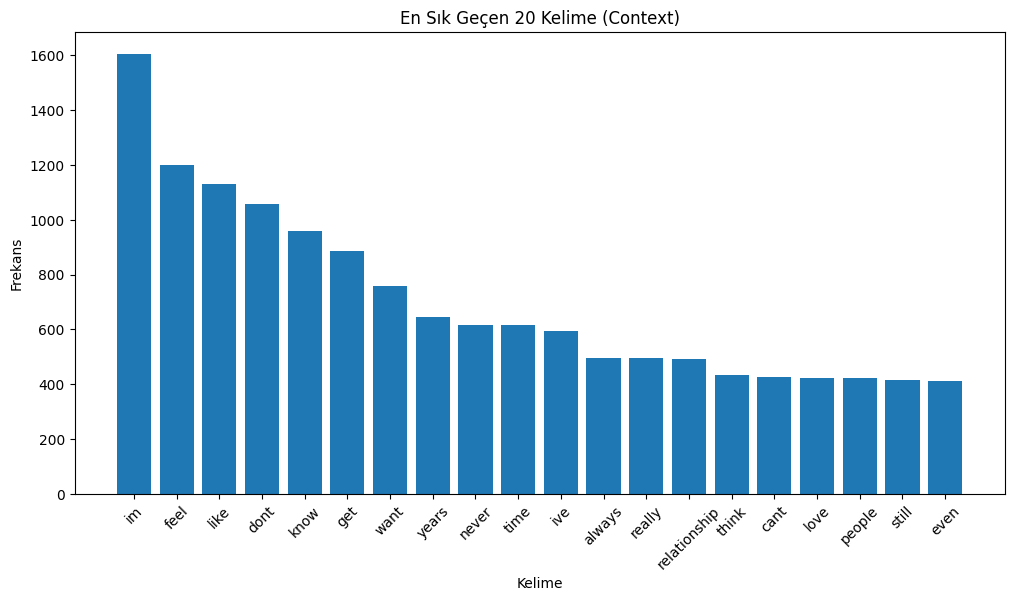

In [77]:
# Barplot (sütun) grafik:
# word_freq DataFrame'ini kullanarak en sık geçen kelimeleri çubuk grafik ile görselleştiriyoruz.

import matplotlib.pyplot as plt

word_freq = word_counts.sum().sort_values(ascending=False).reset_index()
word_freq.columns = ['words', 'tf']

# En sık geçen ilk 20 kelimeyi görselleştir
plt.figure(figsize=(12, 6))
plt.bar(word_freq['words'][:20], word_freq['tf'][:20])
plt.xlabel('Kelime')
plt.ylabel('Frekans')
plt.title('En Sık Geçen 20 Kelime (Context)')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Response içindeki kelimelerin görselleştirilmesi için öncelikle countvectorizer uygulayalım:

count_v = CountVectorizer()
X = count_v.fit_transform(df["Response"])

# Sonuçları bir DataFrame'e çevirelim
word_counts = pd.DataFrame(X.toarray(), columns=count_v.get_feature_names_out())

print(word_counts.sum().sort_values(ascending=False))

may                     2863
feel                    2645
would                   2327
help                    2266
like                    2210
                        ... 
allwhat                    1
disappointmentyou          1
disappointing              1
abalancedapproachcom       1
youthreatening             1
Length: 14834, dtype: int64


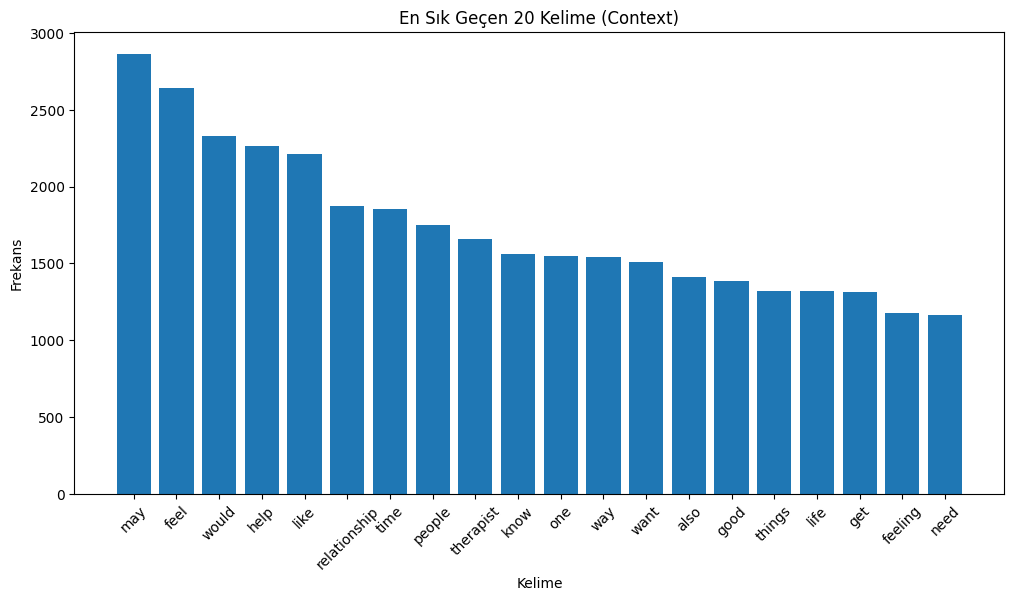

In [79]:
# Barplot (sütun) grafik:
# word_freq DataFrame'ini kullanarak en sık geçen kelimeleri çubuk grafik ile görselleştiriyoruz.

import matplotlib.pyplot as plt

word_freq = word_counts.sum().sort_values(ascending=False).reset_index()
word_freq.columns = ['words', 'tf']

# En sık geçen ilk 20 kelimeyi görselleştir
plt.figure(figsize=(12, 6))
plt.bar(word_freq['words'][:20], word_freq['tf'][:20])
plt.xlabel('Kelime')
plt.ylabel('Frekans')
plt.title('En Sık Geçen 20 Kelime (Context)')
plt.xticks(rotation=45)
plt.show()

In [80]:
# 'word_counts' içerisindeki kelimeleri ve toplam frekanslarını sıralayalım:
word_freq = word_counts.sum().sort_values(ascending=False).reset_index()

# DataFrame'e uygun sütun isimlerini veriyoruz
word_freq.columns = ['words', 'tf']
word_freq

,words,tf
0,may,2863
1,feel,2645
2,would,2327
3,help,2266
4,like,2210
...,...,...
14829,allwhat,1
14830,disappointmentyou,1
14831,disappointing,1
14832,abalancedapproachcom,1


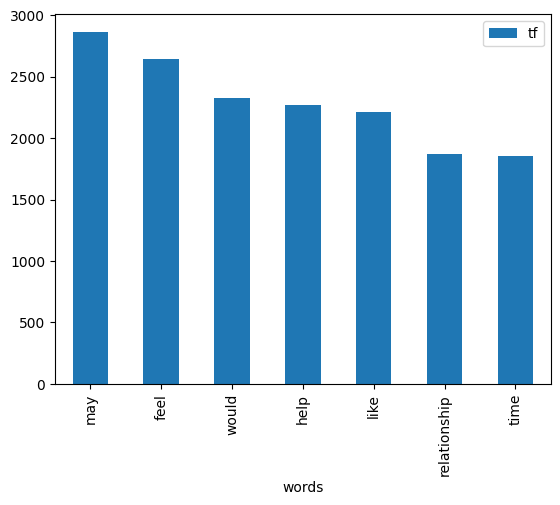

In [85]:
# Barplot for Response:

word_freq[word_freq["tf"] > 1800].plot.bar(x="words", y="tf")
plt.show()

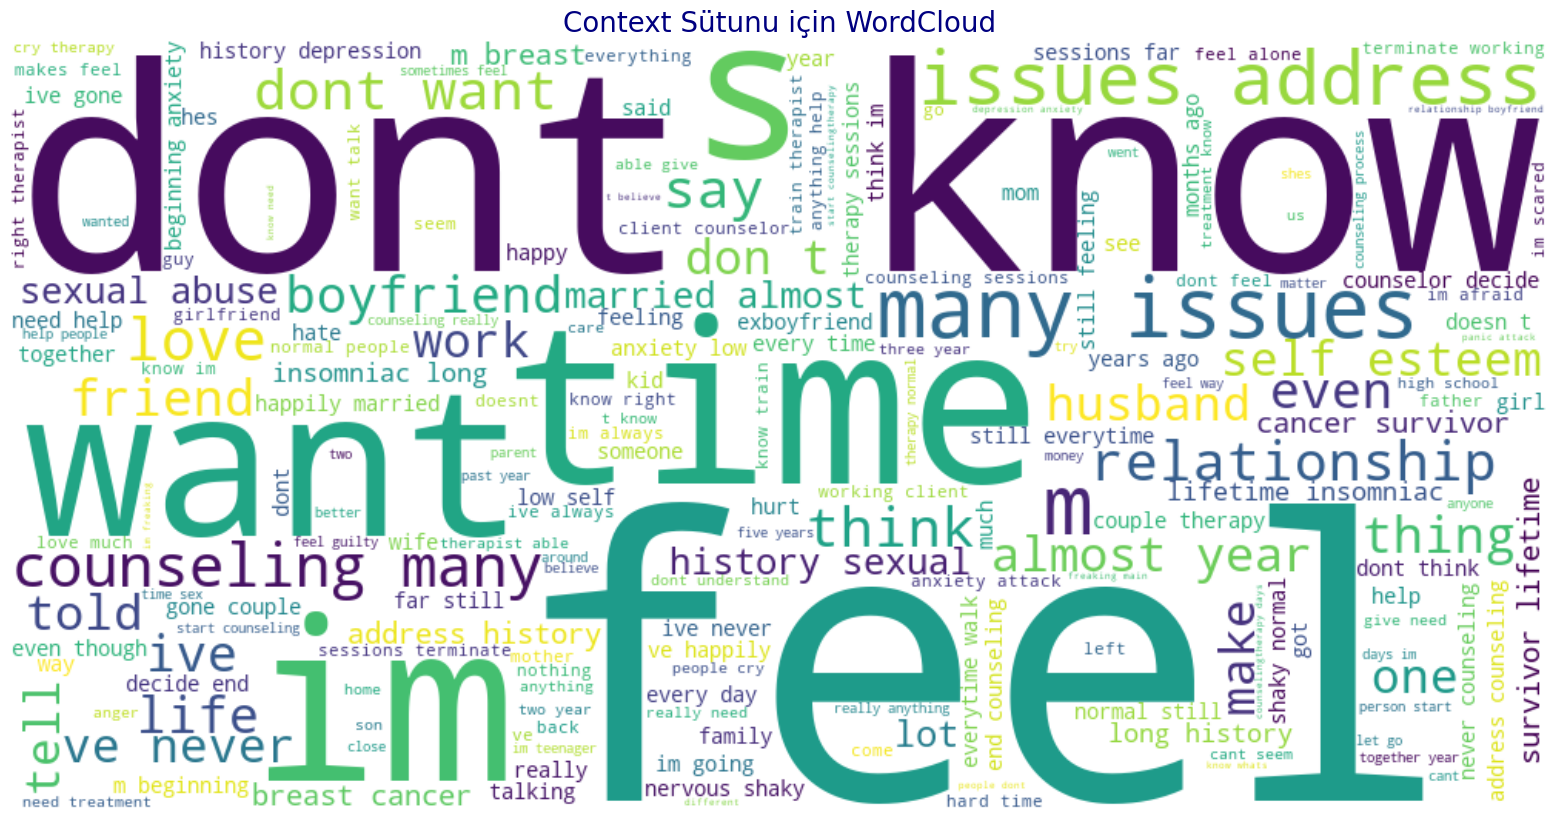

In [87]:
# Daha profesyonel bir WordCloud görselleştirmesi:
from wordcloud import WordCloud, STOPWORDS

# WordCloud için ek ayarlar ve profesyonel görünüm
text_Context = " ".join(i for i in df.Context)

# Arka plan rengi, font boyutu, renk paleti ve stopwords ayarları ile özelleştiriyoruz
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=200,
    stopwords=STOPWORDS,
    contour_width=2,
    contour_color='steelblue',
    prefer_horizontal=0.9,
    random_state=42
).generate(text_Context)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Context Sütunu için WordCloud", fontsize=20, color='navy')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Daha profesyonel bir WordCloud görselleştirmesi (Response sütunu için):
from wordcloud import WordCloud, STOPWORDS

text_Response = " ".join(str(i) for i in df.Response)

wordcloud_Response = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='plasma',
    max_words=200,
    stopwords=STOPWORDS,
    contour_width=2,
    contour_color='darkred',
    prefer_horizontal=0.9,
    random_state=42
).generate(text_Response)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_Response, interpolation="bilinear")
plt.axis("off")
plt.title("Response Sütunu için WordCloud", fontsize=20, color='darkred')
plt.tight_layout(pad=0)
plt.show()

# Kaydetmek isterseniz:
# wordcloud_Response.to_file("response_wordcloud.png")